# Telco Customer Churn Prediction

## Overview on Dataset

### Import Libraries

In [ ]:
! pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt #type: ignore
import seaborn as sns #type: ignore

### Loading and Inspecting the Data
We start by loading the dataset and examining its structure:

In [2]:
data = pd.read_csv('../Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
data = data.drop(['customerID'], axis=1)
data.shape

KeyError: "['customerID'] not found in axis"

In [4]:
data.duplicated().sum()

22

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
for col in data:
    print(f"{col.capitalize()} has :")
    print(f"{data[col].unique()}\n")

Gender has :
['Female' 'Male']

Seniorcitizen has :
[0 1]

Partner has :
['Yes' 'No']

Dependents has :
['No' 'Yes']

Tenure has :
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Phoneservice has :
['No' 'Yes']

Multiplelines has :
['No phone service' 'No' 'Yes']

Internetservice has :
['DSL' 'Fiber optic' 'No']

Onlinesecurity has :
['No' 'Yes' 'No internet service']

Onlinebackup has :
['Yes' 'No' 'No internet service']

Deviceprotection has :
['No' 'Yes' 'No internet service']

Techsupport has :
['No' 'Yes' 'No internet service']

Streamingtv has :
['No' 'Yes' 'No internet service']

Streamingmovies has :
['No' 'Yes' 'No internet service']

Contract has :
['Month-to-month' 'One year' 'Two year']

Paperlessbilling has :
['Yes' 'No']

Paymentmethod has :
['Electronic check' 'Mailed check' 'Bank transfer (automa

## Data Pre-processing

### Changing Object to int

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

### Handling Missing Value

In [11]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
data.loc[(data['TotalCharges'].isnull()) & (data['tenure'] == 0), 'TotalCharges'] = 0.0

In [13]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Changing Yes/No to bool

#### Encoding Target Value (Converting Churn into Numerical)

In [14]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

### Changing 1/0 to Yes/No

In [15]:
data['SeniorCitizen'] = data['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [ ]:
data

## Feature Engineering

### Putting tenure into tenure groups

In [16]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [17]:
# 1 Year Tenure Group

bins = [0,12,24,36,48, data['tenure'].max()]
labels = ['1 Year', '2 Year', '3 Year', '4 Year', '>4 Years']
data['tenure_group'] = pd.cut(data['tenure'], bins=bins, labels=labels)
grouped = data.groupby('tenure_group').size().reset_index(name='total_churned_customers')

In [18]:
grouped = data.groupby('tenure_group').size().reset_index(name='total_churned_customers')

In [19]:
data['CLV'] = data['tenure'] * data['MonthlyCharges']

data['AvgMonthlyCharges'] = data['TotalCharges'] / data['tenure']
data['AvgMonthlyCharges'] = data['AvgMonthlyCharges'].fillna(data['MonthlyCharges'])


## Exploratory Data Analysis

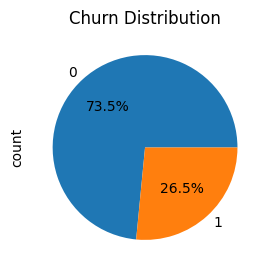

In [20]:
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(3,3))
plt.title('Churn Distribution')
plt.show()


In [21]:
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']

numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges','CLV','AvgMonthlyCharges']

### Univariate Analysis (Distribution of Individual Features)

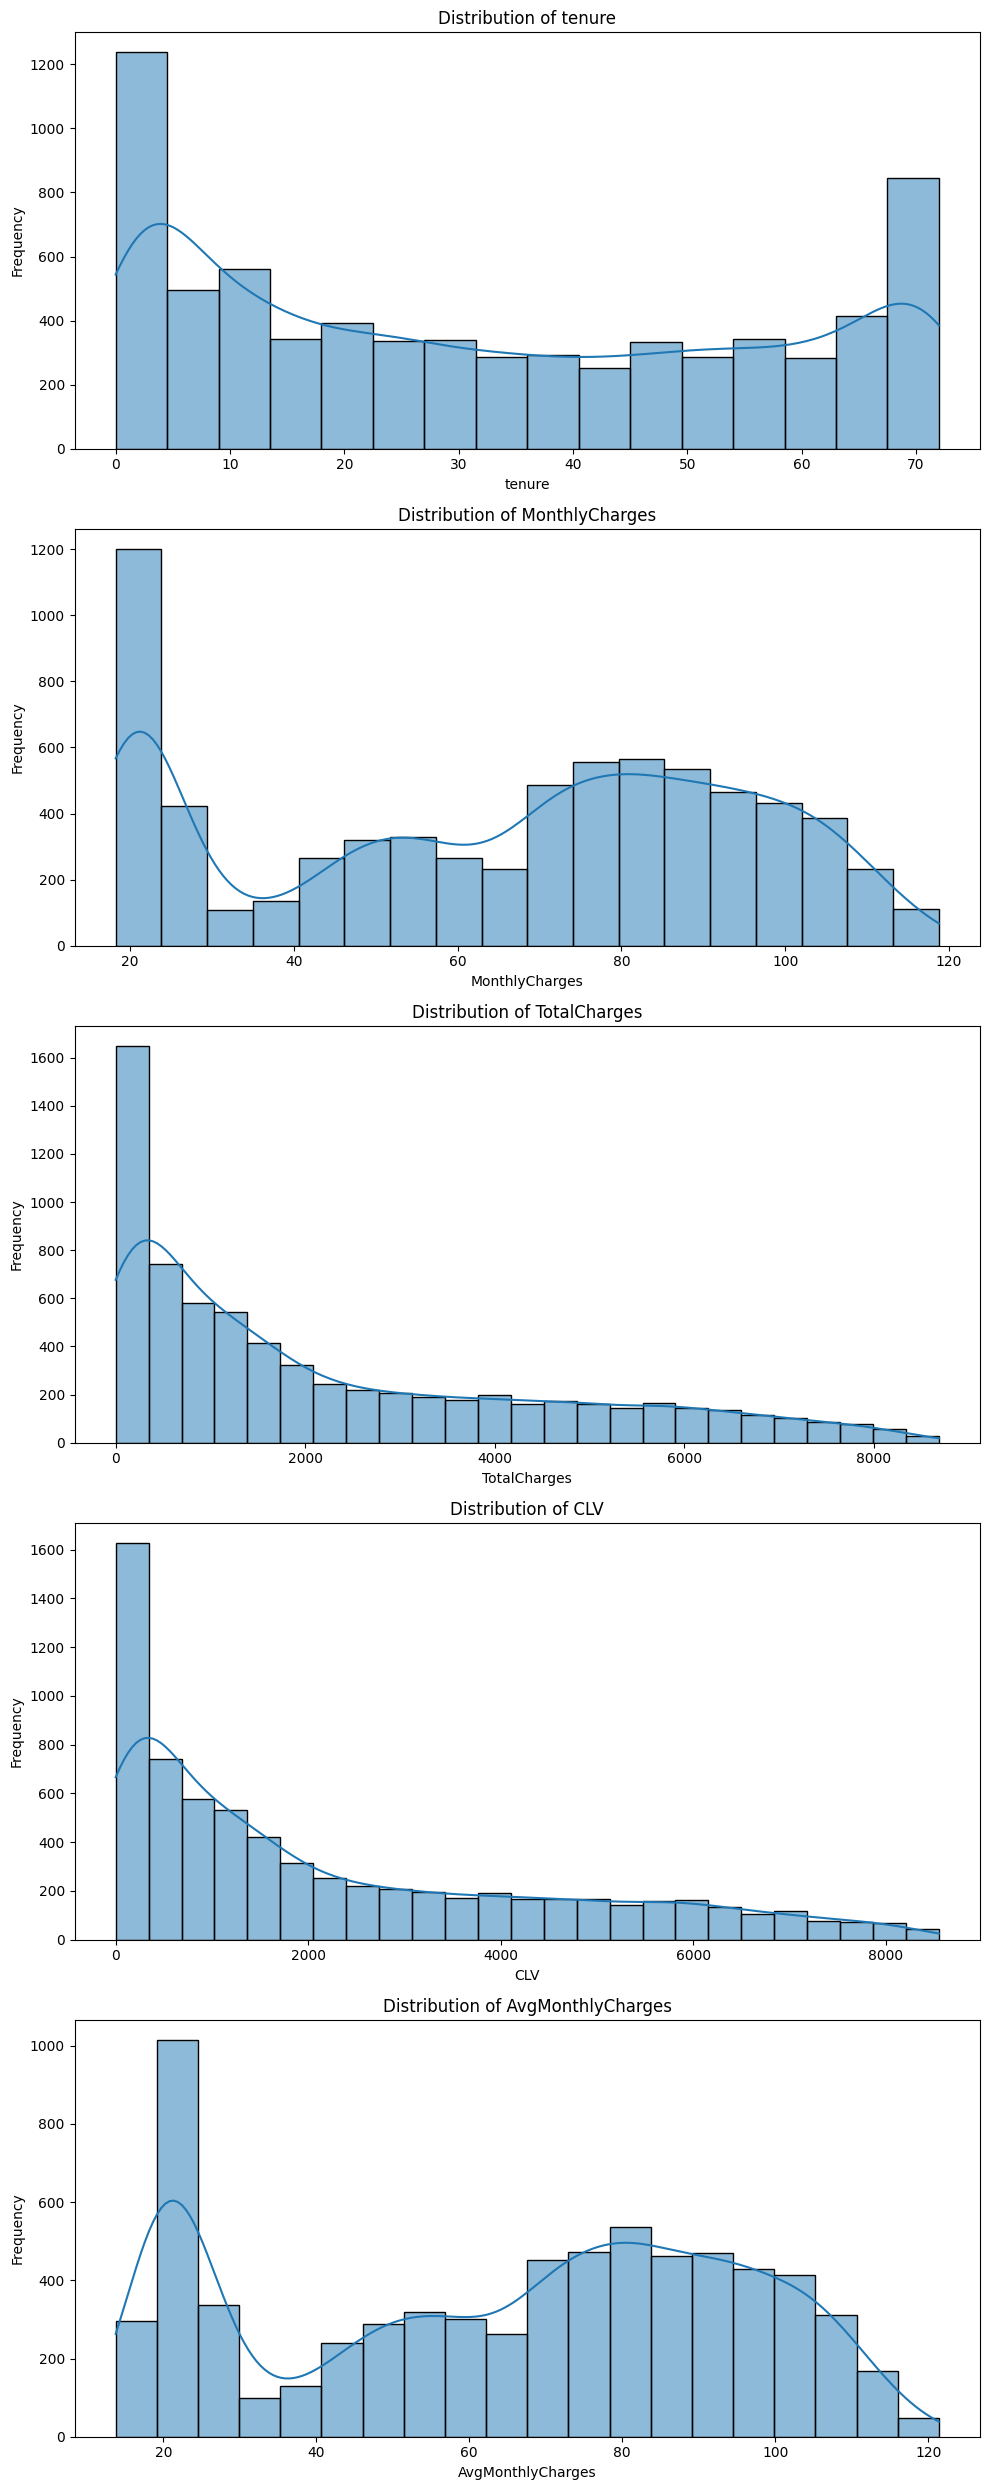

In [22]:
# Univariate Analysis for Numerical Variables
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=1, figsize=(10,5 * len(numerical_vars)))

for i, col in enumerate(numerical_vars):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

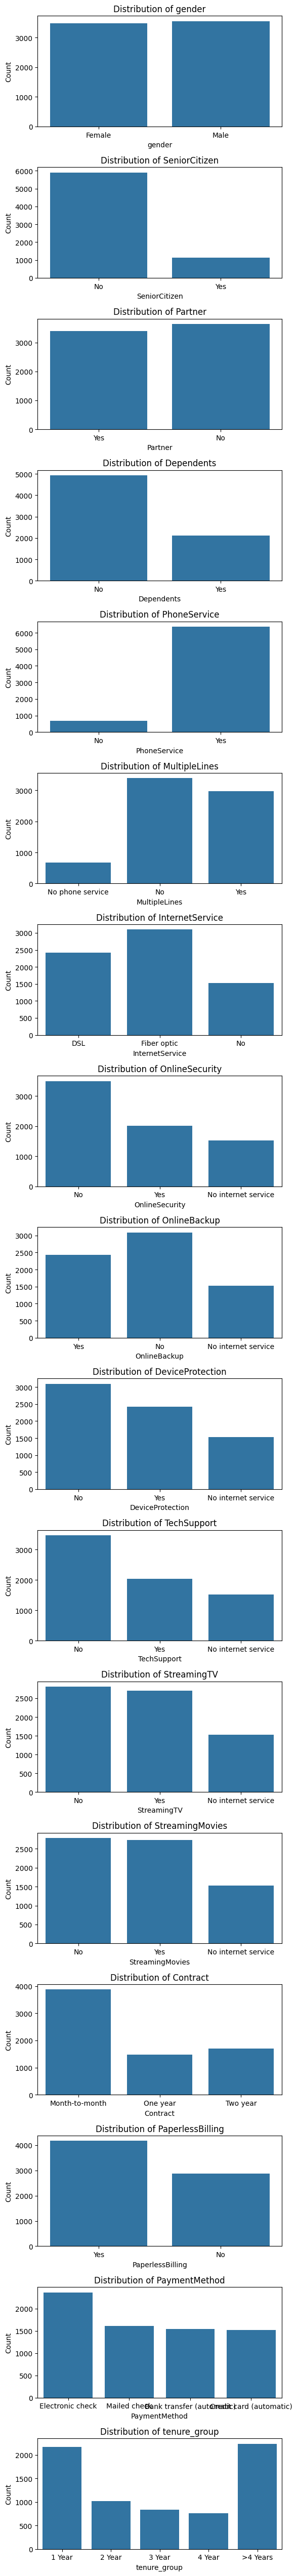

In [23]:
# Univariate Analysis for Categorical Variables
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(6, 3 * len(categorical_vars)))

for i, col in enumerate(categorical_vars):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

###  Bivariate Analysis (Churn vs Other Features)

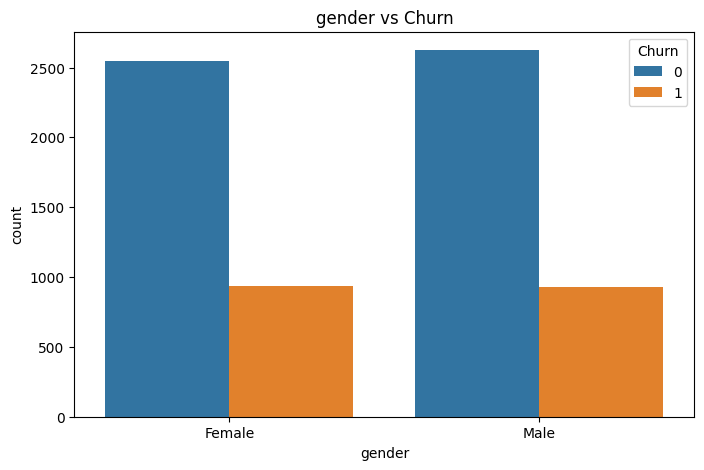

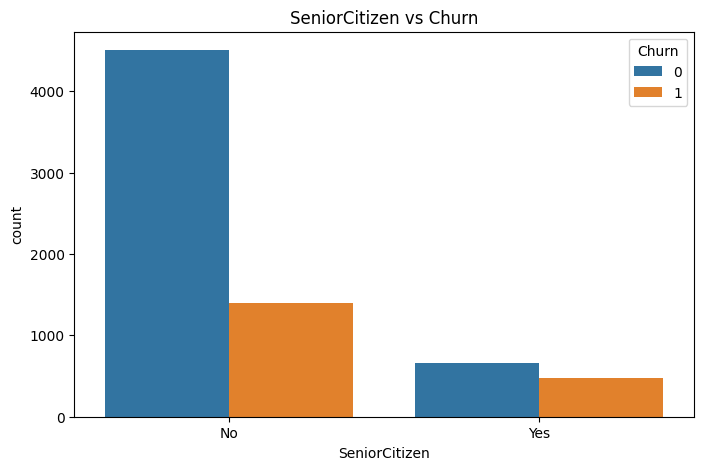

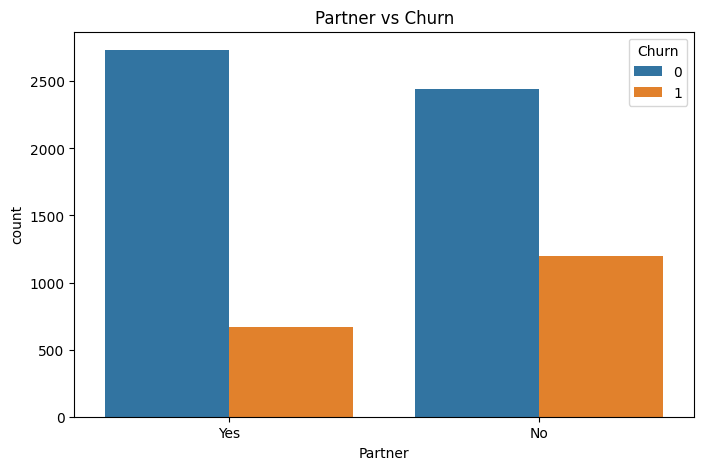

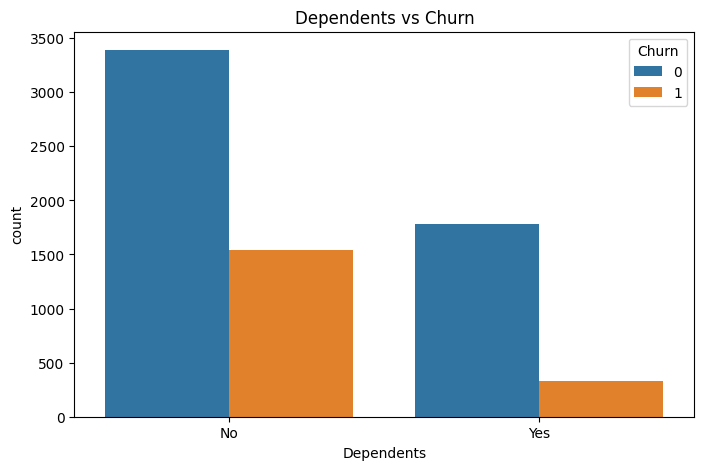

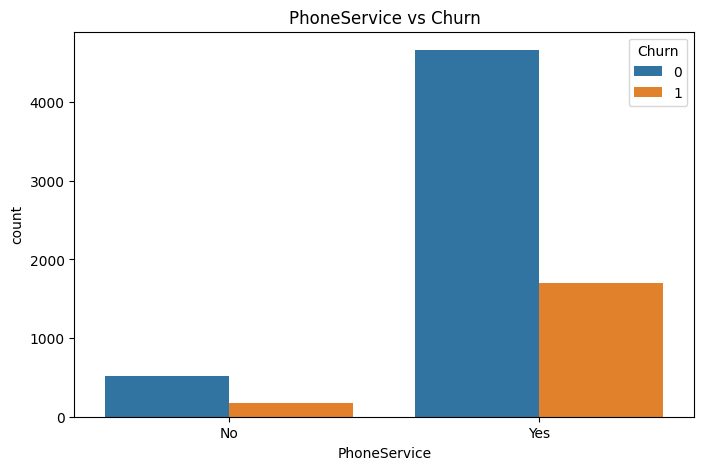

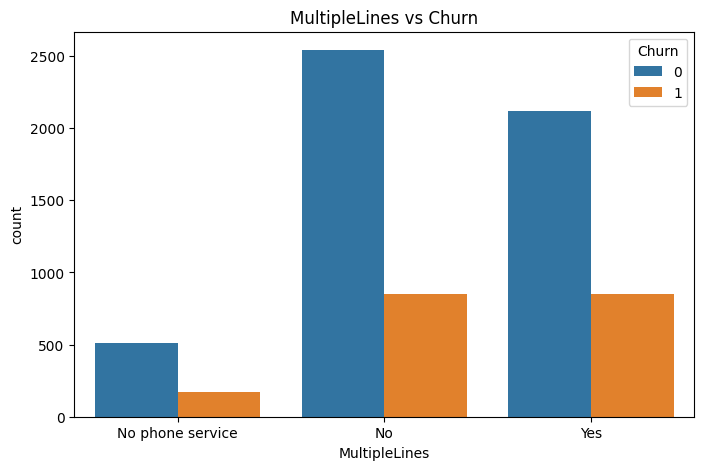

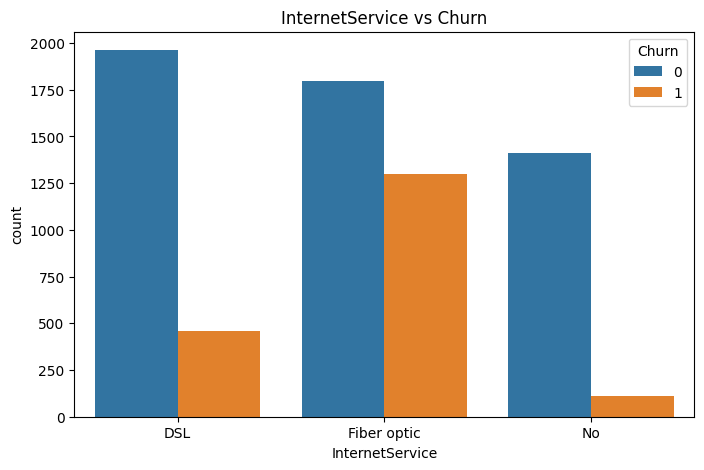

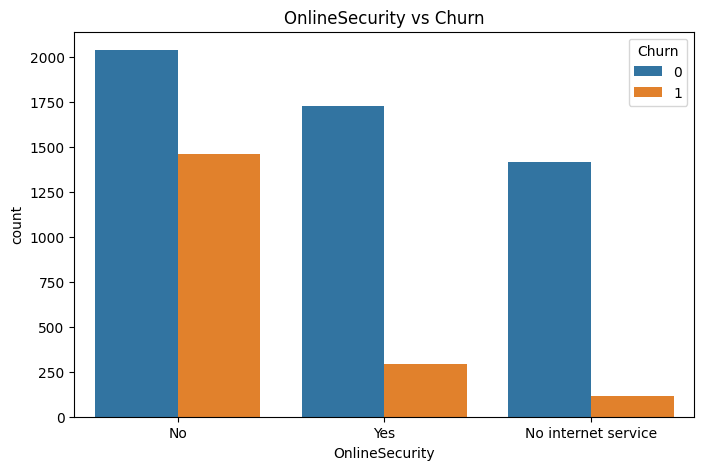

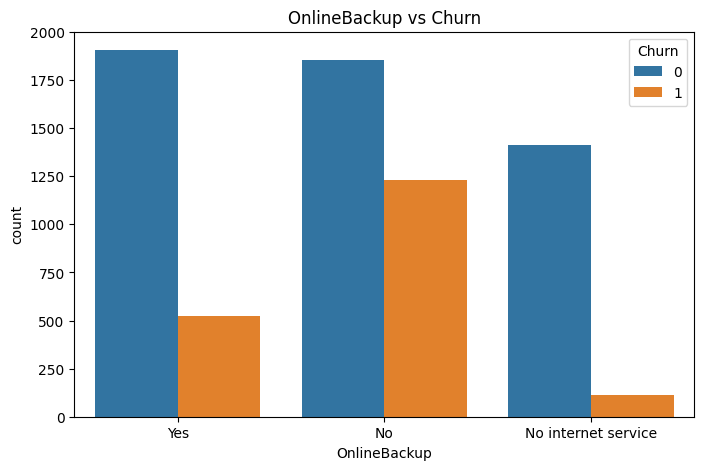

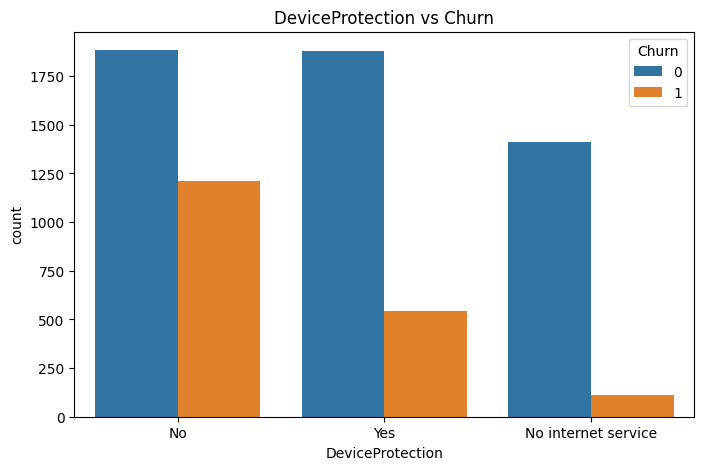

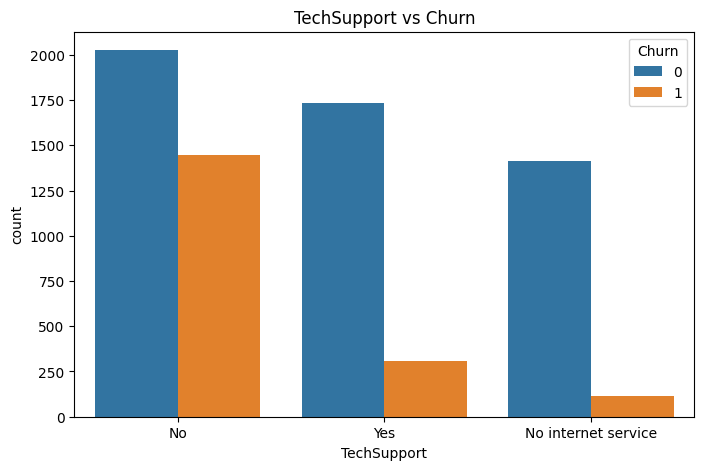

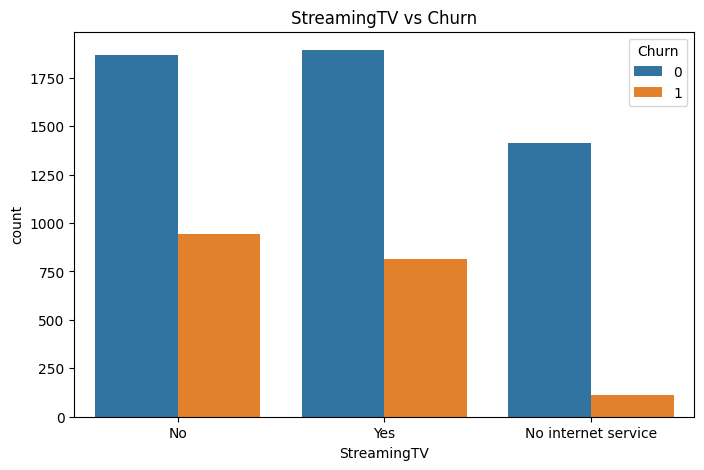

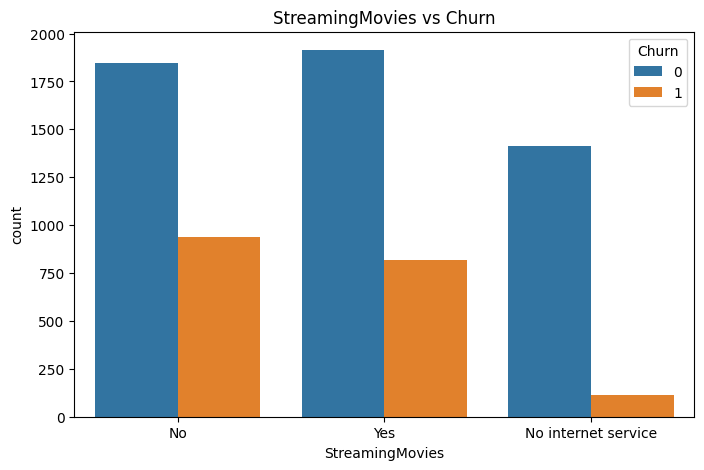

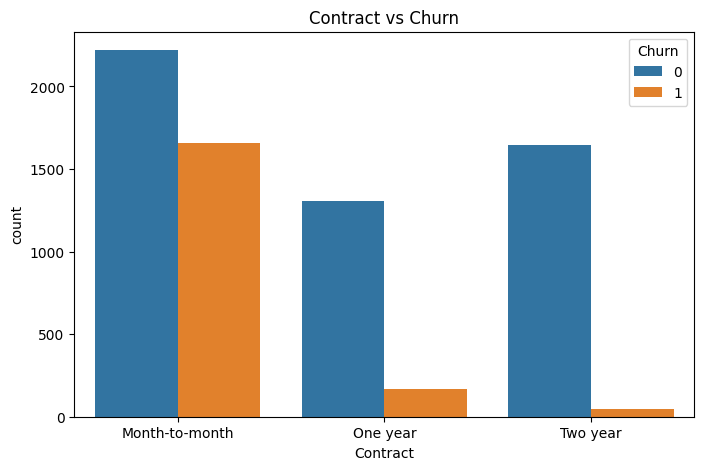

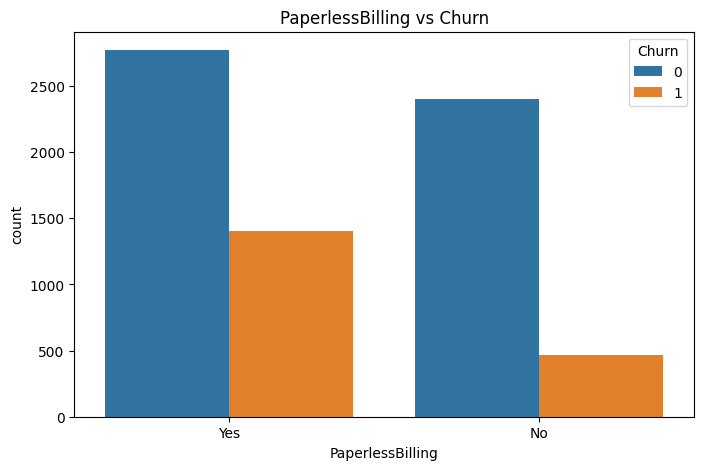

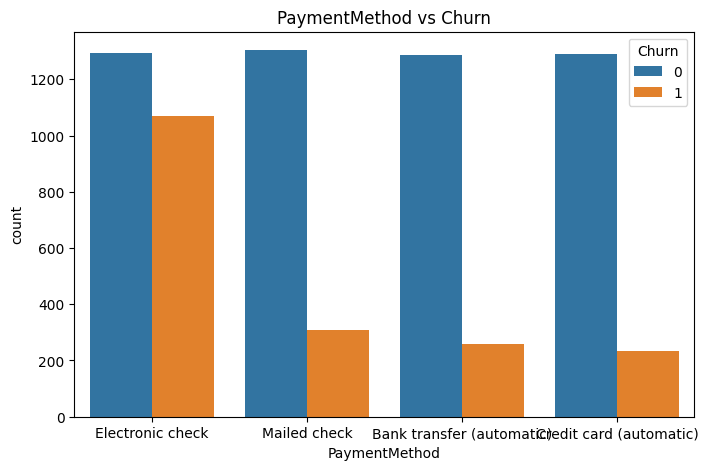

In [24]:
for col in categorical_vars[:-1]:  # excluding 'Churn'
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'{col} vs Churn')
    plt.show()

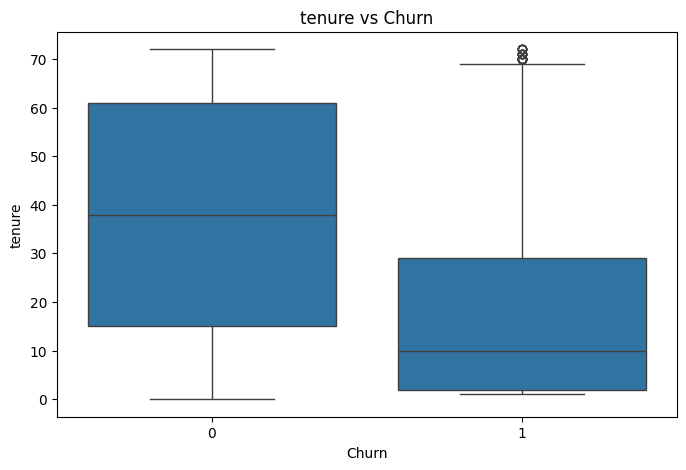

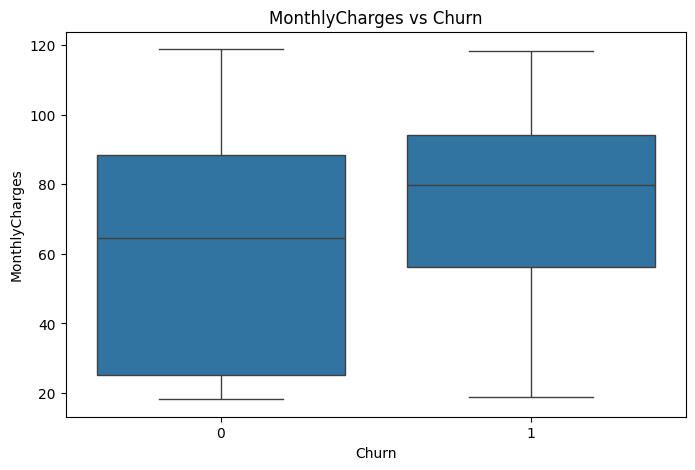

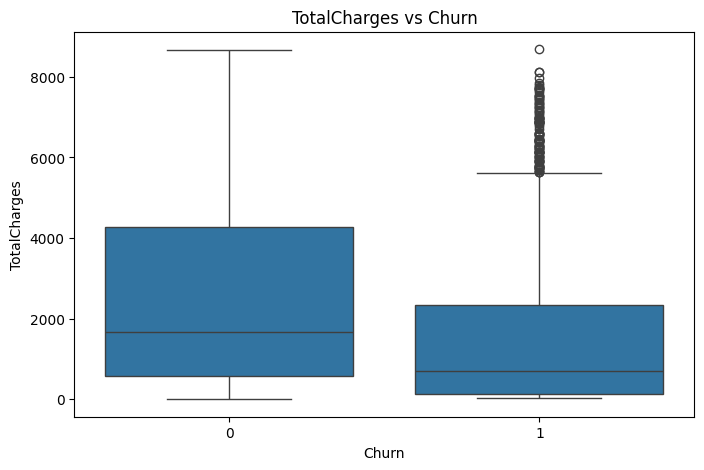

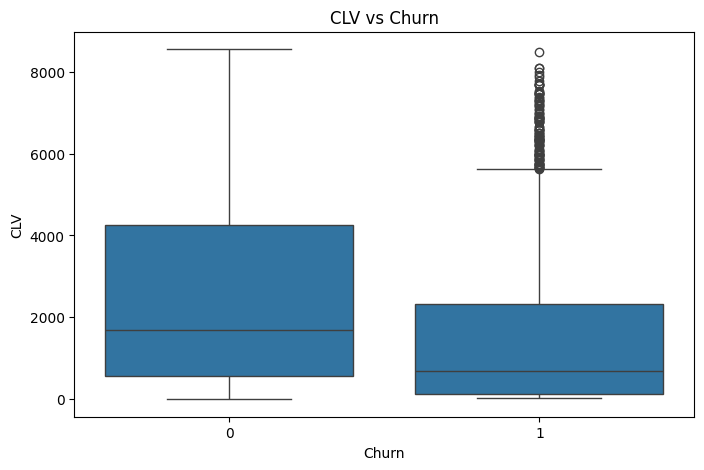

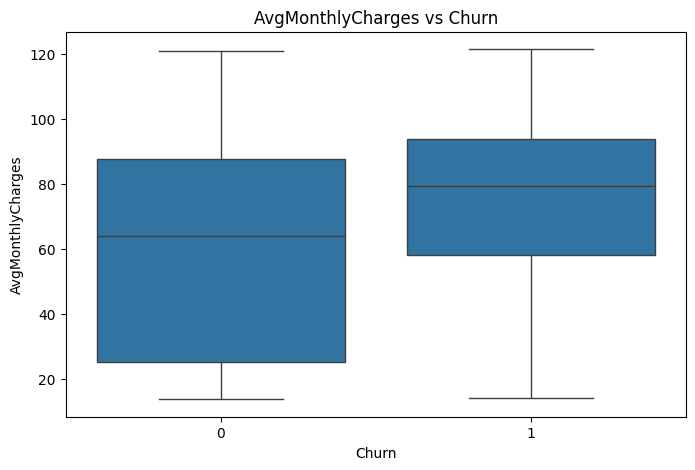

In [25]:

# Numerical variables vs Churn
for col in numerical_vars:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} vs Churn')
    plt.show()

### Correlation Heatmap

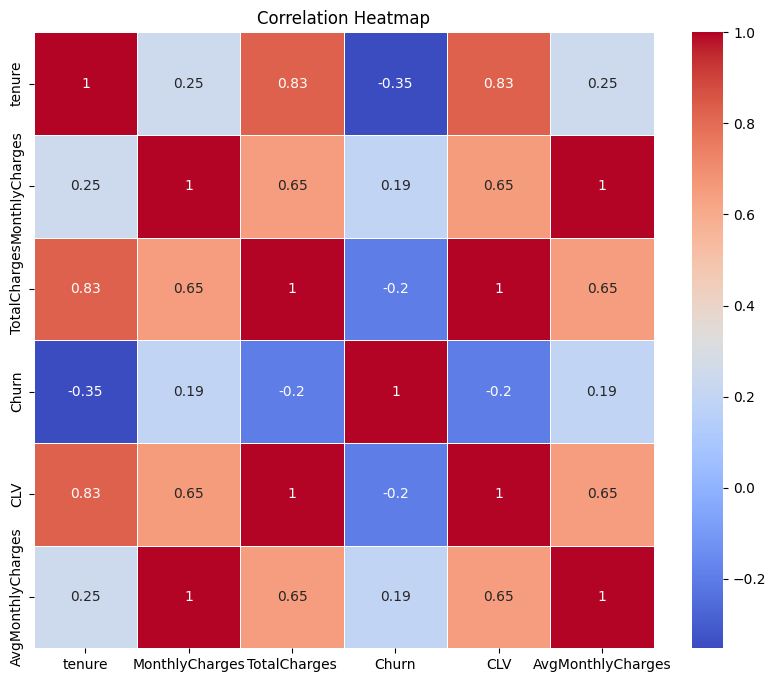

In [26]:
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()